# Project - EDA with Pandas Using the Boston Housing Data

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this more free-form project, you'll get a chance to practice all of these skills with the Boston Housing dataset, which contains housing values in the suburbs of Boston. The Boston housing data is commonly used by aspiring Data Scientists.

## Objectives

You will be able to:

* Perform a full exploratory data analysis process to gain insight about a dataset 

## Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At a minimum, this should include:

* Loading the data (which is stored in the file `'train.csv'`) 
* Use built-in Python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations like `.loc`, `.iloc`, or related operations.   Explain why you used the chosen subsets and do this for three possible 2-way splits. State how you think the two measures of centrality and/or dispersion might be different for each subset of the data. Examples of potential splits:
    - Create two new DataFrames based on your existing data, where one contains all the properties next to the Charles river, and the other one contains properties that aren't 
    - Create two new DataFrames based on a certain split for crime rate 
* Next, use histograms and scatter plots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

## Variable Descriptions

This DataFrame contains the following columns:

- `crim`: per capita crime rate by town  
- `zn`: proportion of residential land zoned for lots over 25,000 sq.ft  
- `indus`: proportion of non-retail business acres per town   
- `chas`: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)  
- `nox`: nitrogen oxide concentration (parts per 10 million)   
- `rm`: average number of rooms per dwelling   
- `age`: proportion of owner-occupied units built prior to 1940  
- `dis`: weighted mean of distances to five Boston employment centers   
- `rad`: index of accessibility to radial highways   
- `tax`: full-value property-tax rate per \$10,000   
- `ptratio`: pupil-teacher ratio by town    
- `b`: 1000(Bk - 0.63)^2 where Bk is the proportion of African American individuals by town   
- `lstat`: lower status of the population (percent)   
- `medv`: median value of owner-occupied homes in $10000s 
  
    
Source
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.


In [104]:
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt


df = pd.read_csv('train.csv')
df.head()


,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [71]:
var_list = ['medv', 'crim', 'tax']
print('Standard Deviation')
print(df.loc[:, var_list].std(), '\n')
print('Mean')
print(df.loc[:, var_list].mean(), '\n')
print('Median')
print(df.loc[:, var_list].median())

Standard Deviation
medv      9.173468
crim      7.352272
tax     170.841988
dtype: float64 

Mean
medv     22.768769
crim      3.360341
tax     409.279279
dtype: float64 

Median
medv     21.60000
crim      0.26169
tax     330.00000
dtype: float64


I'm curious to see if the subset of neighborhoods on the river have a higher median home value than those that are not on the river. I expect the mean to go up for the river_bound subset because I think home-values are higher when they're near water.  The standard deviation should be higher for the river_bound subset as well because it is a smaller subset and will be more disperse. 

In [100]:
#Home value for tracts bound by river and not bound by river

river_bound_home_val = df[df['chas'] ==1]['medv']
non_river_bound_home_val = df[df['chas'] ==0]['medv']
print('River-Bound')
print(river_bound_home_val.describe(), '\n')
print('Non-River-Bound')
print(non_river_bound_home_val.describe(), '\n')
print('Median Value Statistics')
print(df.medv.describe())

River-Bound
count    20.000000
mean     30.175000
std      12.362204
min      13.400000
25%      21.700000
50%      26.050000
75%      37.900000
max      50.000000
Name: medv, dtype: float64 

Non-River-Bound
count    313.000000
mean      22.295527
std        8.746397
min        5.000000
25%       17.200000
50%       21.200000
75%       24.700000
max       50.000000
Name: medv, dtype: float64 

Median Value Statistics
count    333.000000
mean      22.768769
std        9.173468
min        5.000000
25%       17.400000
50%       21.600000
75%       25.000000
max       50.000000
Name: medv, dtype: float64


I wanted to see variables that would affect a potential homebuyer's decision on neighborhood.  I also wanted to see if the stats from a variable in the subset differ much from the variable's stats in dataframe.  I think the Pupil-teacher ratio variable should have similar descriptive statistics because Boston and neighboring suburbs are densely populated and that probably has the same effect on class size and teacher availability.

In [98]:
#Subset by Median value of homes that are roughly a standard deviation more than the mean

hood = df.loc[df['medv'] > 31, ['tax', 'medv', 'rad', 'rm', 'crim', 'ptratio']]
print('Neighborhoods with higher home value')
print(hood, '\n')
print('Pupil-Teacher Ratio Stats in Neighborhoods with higher home value')
print(hood.ptratio.describe(), '\n')
print('Pupil-Teacher Ratio Stats in all neighborhoods')
print(df.ptratio.describe())

Neighborhoods with higher home value
     tax  medv  rad     rm     crim  ptratio
2    222  33.4    3  6.998  0.03237     18.7
3    222  36.2    3  7.147  0.06905     18.7
23   252  34.9    3  7.024  0.03359     18.3
35   226  35.4    5  7.249  0.01311     17.9
37   256  31.6    5  6.816  0.01432     15.1
42   216  33.0    3  7.104  0.01951     18.6
109  403  50.0    5  7.489  1.46336     14.7
110  403  50.0    5  8.375  1.51902     14.7
113  403  50.0    5  7.929  2.01019     14.7
125  193  37.2    3  6.980  0.05780     17.8
126  193  39.8    3  7.765  0.06588     17.8
127  193  36.2    3  6.144  0.06888     17.8
128  193  37.9    3  7.155  0.09103     17.8
129  193  32.5    3  6.563  0.10008     17.8
130  193  50.0    3  7.831  0.05602     17.8
131  398  32.0    5  6.782  0.07875     15.2
132  398  34.9    5  7.185  0.08370     15.2
133  398  37.0    5  6.951  0.09068     15.2
135  398  36.4    5  7.178  0.08664     15.2
136  265  31.1    1  6.800  0.02187     15.6
139  402  32.9    

For this subset, I want to look at the same group of neighborhoods that have a higher median of home value, but now I want to look at the crime rate and compare it to the distribution in the dataframe.  I'm predicting that the crime rate per capita will be much lower in the neighborhoods with higher median value homes.


In [102]:
print(hood.crim.describe())
df.crim.describe()

count    52.000000
mean      0.805949
std       1.971095
min       0.009060
25%       0.036562
50%       0.088660
75%       0.521837
max       9.232300
Name: crim, dtype: float64


count    333.000000
mean       3.360341
std        7.352272
min        0.006320
25%        0.078960
50%        0.261690
75%        3.678220
max       73.534100
Name: crim, dtype: float64

<IPython.core.display.Javascript object>


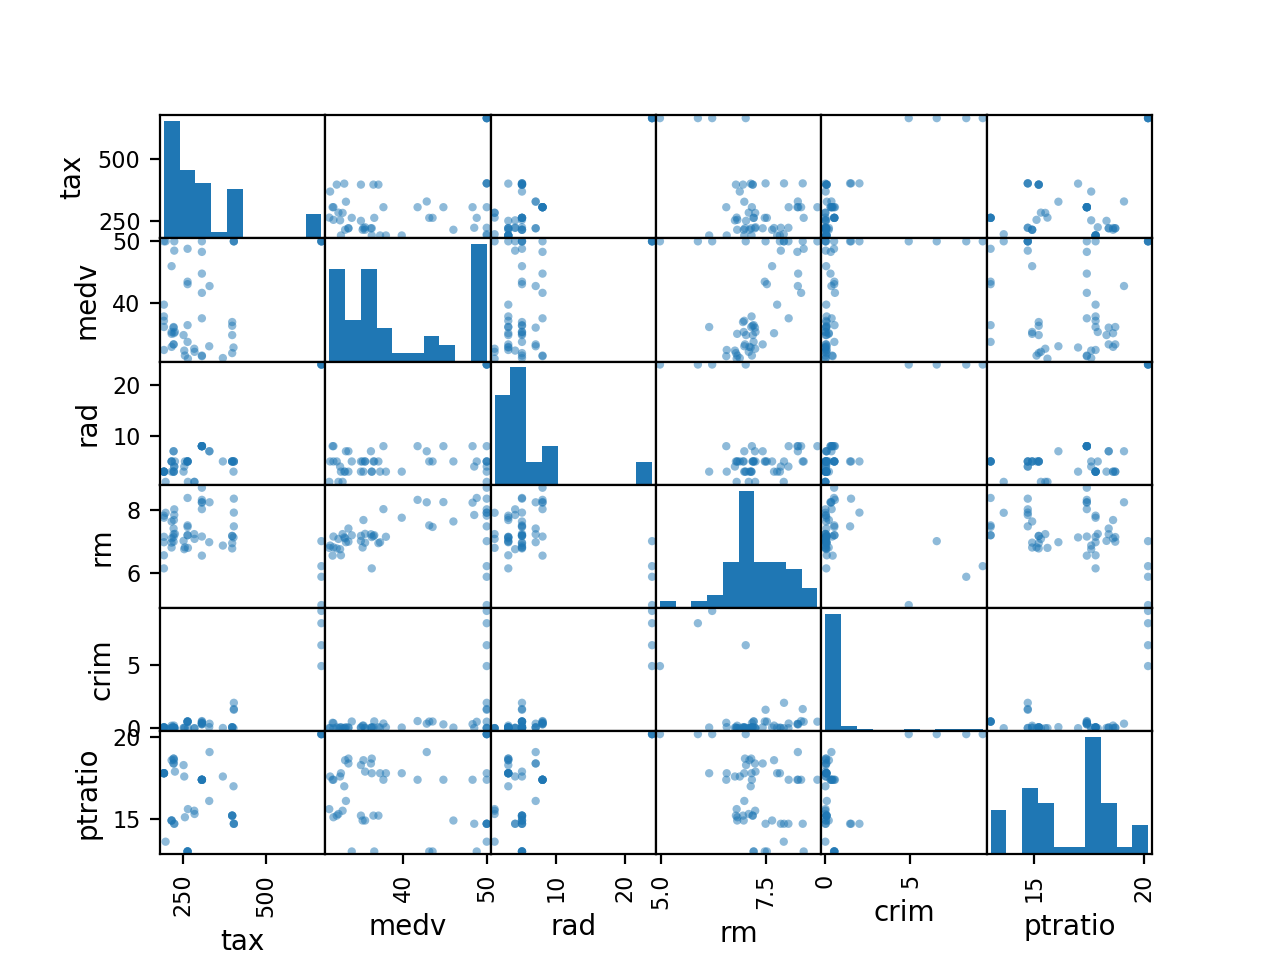

In [114]:
pd.plotting.scatter_matrix(hood);

## Summary

Congratulations, you've completed your first "free form" exploratory data analysis of a popular dataset!